In [1]:
import ee
ee.Initialize()

In [2]:
from iteru import *

In [3]:
from matplotlib import pyplot as plt

In [4]:
Map = Map()
Map

Map(center=[27, 31], controls=(AttributionControl(options=['position', 'prefix'], position='bottomright'), Sea…

In [6]:
aoi = Map.aoi

In [31]:
SAR = SAR = ee.ImageCollection('COPERNICUS/S1_GRD')\
    .filter(ee.Filter.equals('relativeOrbitNumber_start', 50))\
    .filter(ee.Filter.eq('instrumentMode', 'IW'))\
    .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
    .filter(ee.Filter.eq('resolution_meters',10))\
    .filterBounds(aoi)\
    .filterDate('2021-01-01','2021-03-05')\
    .select(['VV','VH']).median()

In [32]:
# Map.add_layer_widgets(SAR,{'min':-25,'max':5,'bands':['VH']},'SAR2')

In [33]:
 VV_smooth = SAR.select('VH').focal_median(100,'circle','meters').rename('VV_Filtered')

In [34]:
histogram =  VV_smooth.reduceRegion(
                                
            reducer = ee.Reducer.histogram().combine('mean', None, True).combine('variance', None, True),
             geometry = aoi, 
             scale = 10,
             bestEffort = True  
)

In [35]:
x = histogram.getInfo()['VV_Filtered_histogram']['bucketMeans']

In [36]:
y = histogram.getInfo()['VV_Filtered_histogram']['histogram']

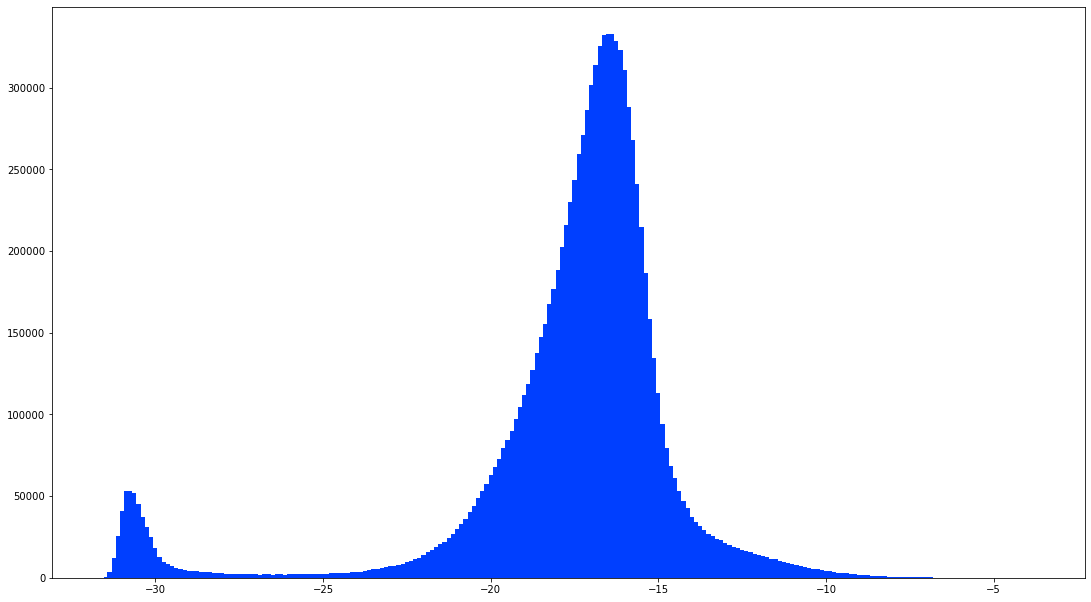

In [37]:
plt.style.use('seaborn-bright')
plt.bar(x,y,width = 0.25)
# plt.legend()
plt.gcf().set_size_inches(18.5,10.5)